## Network Visualization and Vulnerability Detection

- This project will demonstrate how to visually present a collection of nodes in a graph followed by the application of Karger's Minimu Cut Contraction algorithm to find the minimum cut of the graph. The minimum cut of a graph can help spot the vulnerabilities in a network. These vulnerabilities are represented as edges(connections) between nodes(endpoints.) Addressing such vulnerabilities can help strengthen the network.


Reference: https://gist.github.com/aymanfarhat/6098683

In [193]:
import random 
import re
import networkx as nx
import networkx.algorithms.connectivity as nxa
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,15

In [223]:
def graph_func(filename):
    """
    This function takes in the raw txt file, removes blank spaces and line, and creates an adjacency list of nodes and edges.
    It returns g as the graph.
    """
    g = {}
    file = open(filename, 'r')
    
    adj_list = [re.sub('\s+', ' ', str(i.strip('\r\n'))).strip() for i in file]
    for i in range(len(adj_list)):
        temp = adj_list[i].split()
        g[int(temp[0])] = [int(i) for i in temp[1:]]
        
    return g

In [101]:
filename = 'Data/Random Adjacency List.txt'
graph = graph_func(filename)

In [102]:
list_of_keys = list(graph.keys())

In [224]:
#this double for loop takes in g as the graph which is then converted to a list of edges
edges = []
for i in list_of_keys:
    for j in list(graph[i]):
        edges.append((i,j))

In [104]:
G = nx.Graph()
G.add_edges_from(edges)

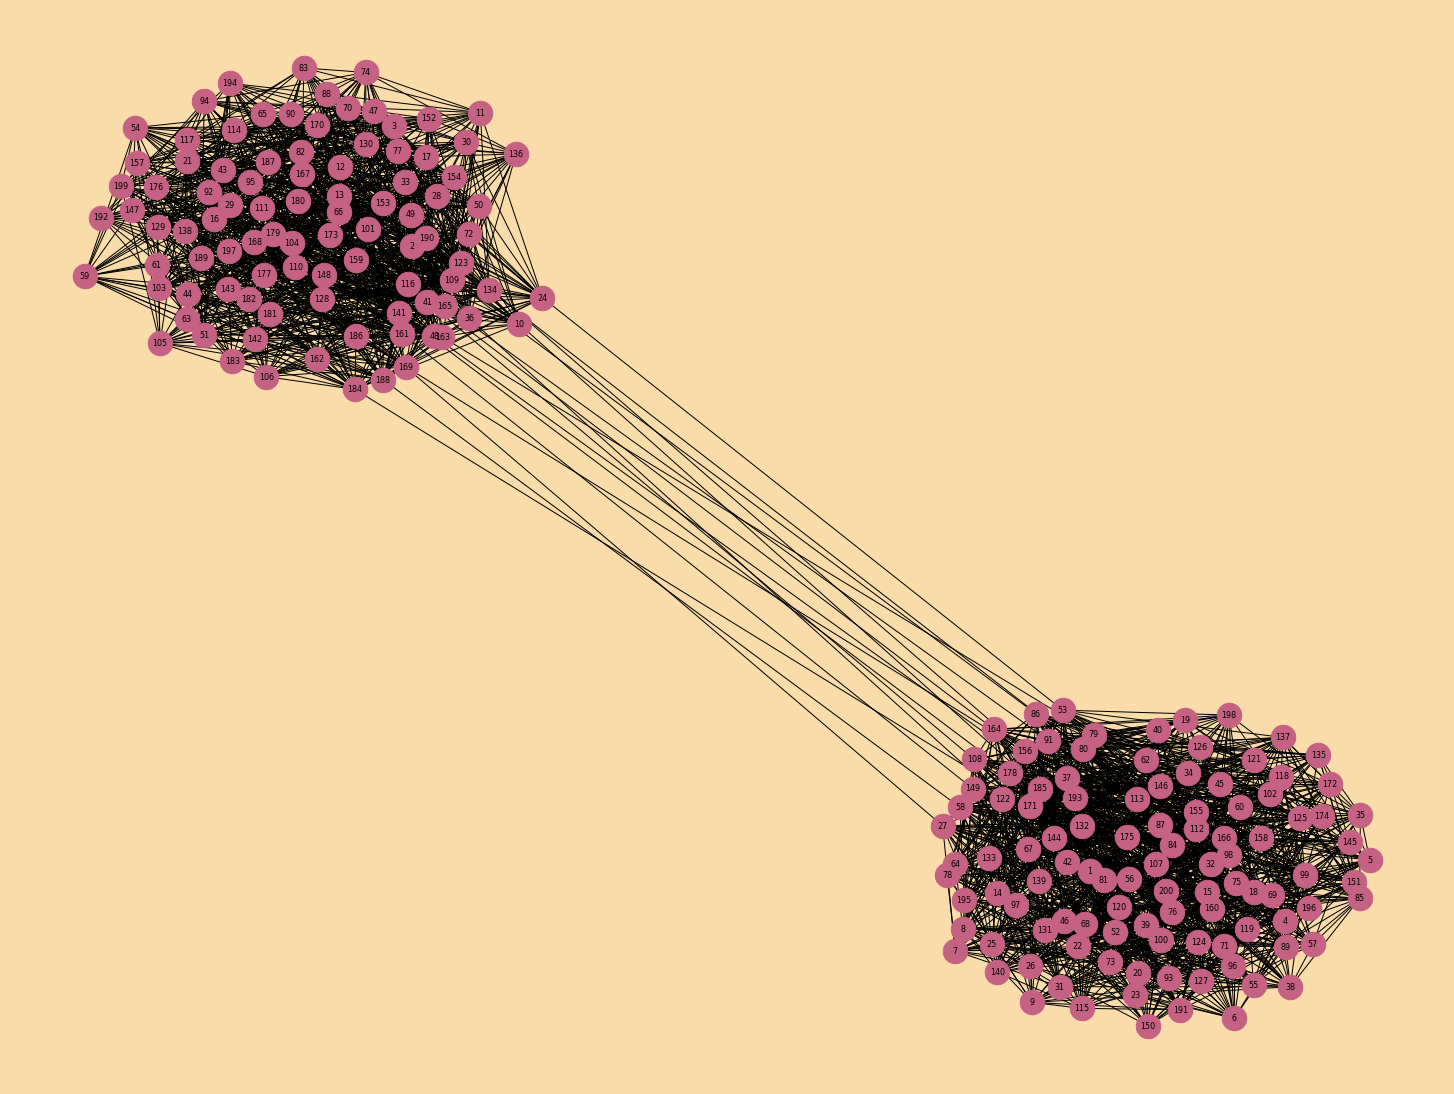

In [109]:
fig = plt.figure()
pos=nx.spring_layout(G, seed=123)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_nodes(G, pos, node_size=600, alpha=None, node_color='#c56183')
fig.set_facecolor('#fadcaa')
plt.show()

### Compute the minimum cut of the graph above using Karger's Minimum Cut Contraction Algorithm

#### Kergar's Minimum Cut Algorithm:  
This algorithm computes the minimum cut of the graph by combining the vertices into two seperate disjoint subset. The cut computed represents the size of the minimum edges which if removed will disconnect the graph. Below is an implementation of the Karger's algorithm.

In [222]:
# Contract an edge between 2 vertices
def contract_edge(edge, g):
    """
    This function takes in as parameters an edge selected at random and the graph containing the edge.
    The edge is contracted starting from the ending vertex to the begining vertex and then the ending vertex is deleted.
    """
    # merge w into u and remove w from graph
    u= g[edge[0]]
    u.extend(g[edge[1]])
    del g[edge[1]]
    
    #replace all occurnces of w value with u
    for k, l in g.items():
        g[k] = [edge[0] if x == edge[1] else x for x in g[k]]
    
    # Remove all self-loops
    g[edge[0]] = [x for x in g[edge[0]] if x != edge[0]]
    
# Randomly select an edge
def get_random_edge(g):
    """
    This function selects an edge at random which is then passed as a
    tuple to the function above.
    """
    u = list(g.keys()) [random.randint(0,len(g)-1)]
    w = g[u] [random.randint(0,len(g[u])-1)]
    return (u, w)


iter_list = []
# Repeat 30 times to get a minimum
for i in range(0,30):
    g = graph_func(filename)

    # contract the edges until only 2 disjoint subsets are left
    while(len(g) > 2):
        contract_edge(get_random_edge(g), g)
    iter_list.append(len(g[list(g.keys())[0]]))

print('After 30 iteration the minimum cut presented by Karger\'s Algorithm is: ', min(min_list))

After 30 iteration the minimum cut presented by Karger's Algorithm is:  17


The minimum number of edges in the cut are 17. To get the list of these edges we use NetworkX's minimum edge cut function.

In [221]:
final_edge_set = list(nxa.minimum_edge_cut(G))
print('Edge set which if removed with disconnect the graph into two disjoint sets: \n', e)

Edge set which if removed with disconnect the graph into two disjoint sets: 
 [(185, 10), (80, 134), (178, 141), (86, 109), (79, 163), (149, 161), (193, 48), (58, 188), (164, 116), (37, 186), (122, 36), (156, 123), (91, 165), (171, 184), (27, 169), (108, 41), (53, 24)]
